In [ ]:
#Predicting Survival in the Titanic Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(url)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'E mbarked'],
      dtype='object')

In [9]:
titanic.shape

(891, 12)

In [13]:
#checking null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

In [16]:
#age is missing..177 in numbers

titanic[['Age','Pclass']].head(20)

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [17]:
def calculate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
titanic['Age']=titanic[['Age','Pclass']].apply(calculate_age,axis=1)

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

In [20]:
titanic.dropna(inplace=True)

In [21]:

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
E mbarked      0
dtype: int64

<AxesSubplot:>

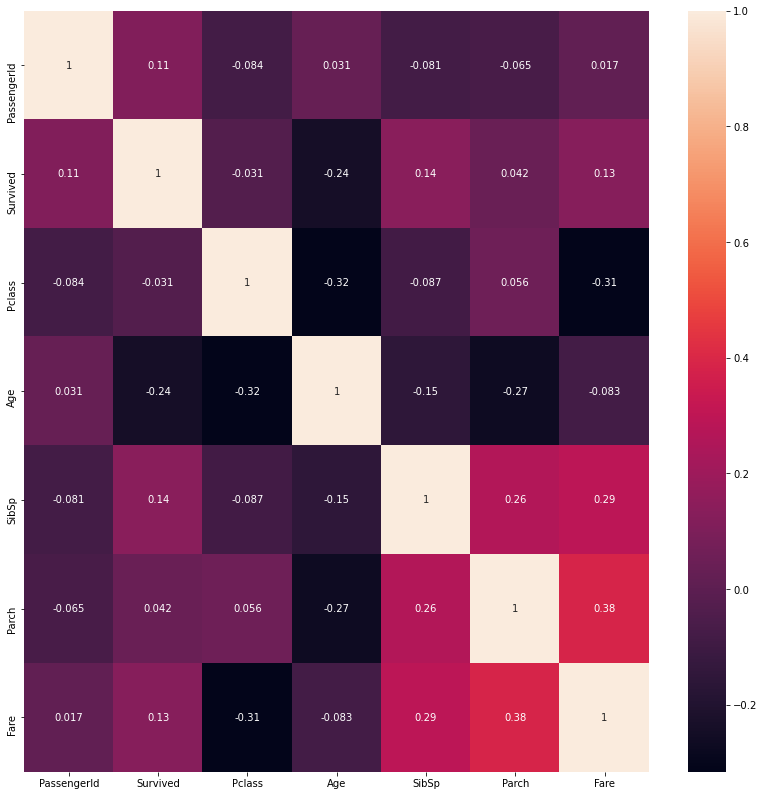

In [23]:
data= titanic.corr()
plt.figure(figsize=(14,14))
sns.heatmap(data=data,annot=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

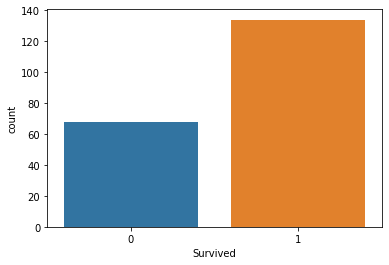

In [24]:
sns.countplot(titanic['Survived'])

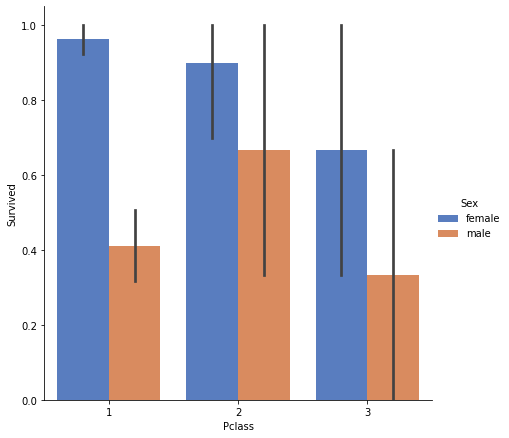

In [26]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='bar',height=6,palette='muted',hue='Sex')

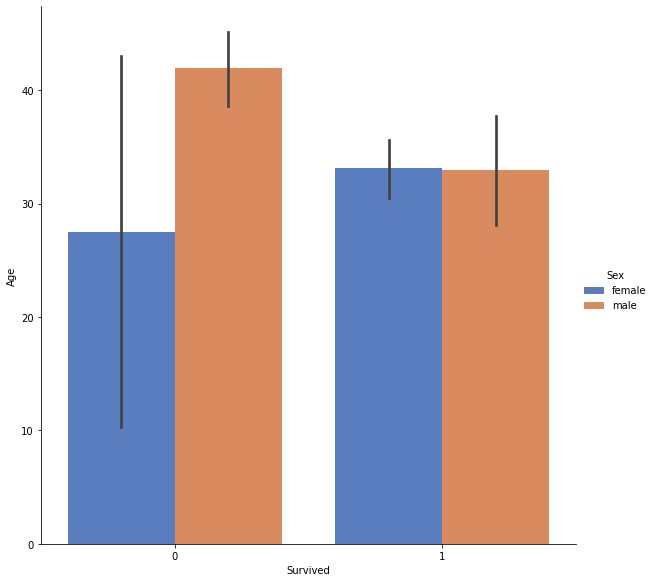

In [27]:
sns.catplot(x='Survived',y='Age',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

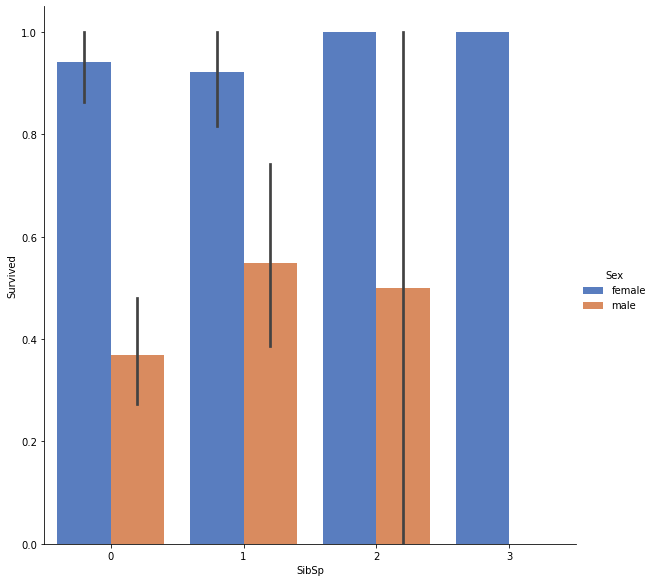

In [28]:
sns.catplot(x='SibSp',y='Survived',data=titanic,kind='bar',palette='muted',height=8,hue='Sex')

In [30]:
titanic.drop(['PassengerId', 'Survived','Name', 'Ticket','E mbarked','Cabin'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,female,38.0,1,0,71.2833
3,1,female,35.0,1,0,53.1000
6,1,male,54.0,0,0,51.8625
10,3,female,4.0,1,1,16.7000
11,1,female,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542
872,1,male,33.0,0,0,5.0000
879,1,female,56.0,0,1,83.1583
887,1,female,19.0,0,0,30.0000


In [31]:
#change sex to numerical
titanic['Sex']=pd.get_dummies(titanic['Sex'])

In [32]:
titanic['Sex']


1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    0
Name: Sex, Length: 202, dtype: uint8

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    uint8  
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  E mbarked    202 non-null    object 
dtypes: float64(2), int64(5), object(4), uint8(1)
memory usage: 29.1+ KB


In [40]:
X=titanic.drop(['PassengerId', 'Survived','Name', 'Ticket','E mbarked','Cabin'],axis=1)
y=titanic['Survived']

In [41]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,1,0,54.0,0,0,51.8625
10,3,1,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542
872,1,0,33.0,0,0,5.0000
879,1,1,56.0,0,1,83.1583
887,1,1,19.0,0,0,30.0000


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [43]:
#applyiong logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8360655737704918

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.7540983606557377

In [45]:
y_pred = dtc.predict(x_test)

In [46]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Accuracy_score = accuracy_score(y_test,y_pred)
Accuracy_score

0.7540983606557377

In [49]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[11,  9],
       [ 6, 35]], dtype=int64)

In [50]:
print(f"Cf_report : {classification_report(y_test,y_pred)}")

Cf_report :               precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.80      0.85      0.82        41

    accuracy                           0.75        61
   macro avg       0.72      0.70      0.71        61
weighted avg       0.75      0.75      0.75        61



In [51]:
#hyperparameter tuniong
X

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,1,0,54.0,0,0,51.8625
10,3,1,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542
872,1,0,33.0,0,0,5.0000
879,1,1,56.0,0,1,83.1583
887,1,1,19.0,0,0,30.0000


In [52]:
#need to standardizing the values of x
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 101)

In [54]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc.score(x_test,y_test)

0.7540983606557377

In [55]:
#by tuning hyper parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}


In [56]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [57]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [58]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'gini', 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}


0.808128078817734

In [59]:
#now apply best parameter in the decision tree


Dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth =23, min_samples_leaf= 2,min_samples_split=8, splitter ='random')
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=23, min_samples_leaf=2, min_samples_split=8,
                       splitter='random')

In [60]:
Dtc2.score(x_test,y_test)

0.6721311475409836

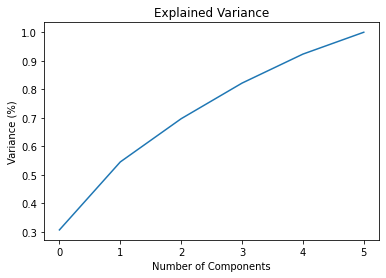

In [61]:
#using pca to increase a accuracy
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [62]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [63]:
principal_x


,PC-1,PC-2,PC-3,PC-4,PC-5
0,0.354009,-0.277425,-1.305084,-0.725305,-0.069862
1,0.300715,-0.077391,-1.299324,-0.794792,-0.175056
2,-1.541314,-0.935283,0.391513,0.110123,0.290289
3,1.346592,4.048167,-0.031783,-0.735474,0.520413
4,-1.183214,-0.587902,-1.454342,0.416082,0.864983
...,...,...,...,...,...
197,0.741800,-0.415182,-0.845989,-0.404587,1.111743
198,-1.361013,0.054908,0.521576,-0.036007,-0.631285
199,-0.013688,-0.716277,-0.815655,1.082885,1.333819
200,-0.225785,0.789684,-1.111828,0.527537,-1.054893


In [64]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 101)
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc.score(x_test,y_test)

0.7049180327868853

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [66]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'random'}


0.8017241379310345

In [69]:
Dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, min_samples_leaf= 4,min_samples_split=8, splitter ='random')
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=8, splitter='random')

In [70]:
Dtc2.score(x_test,y_test)

0.7213114754098361